In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [140]:
authors = pd.read_csv('authors_all.csv', encoding = 'utf-8', sep = ";")

In [111]:
authors.head()


,Id artist,name,name extended,type,Birth year,Death year,Birth city,Birth state,Birth country,Death city,Death state,Death country,Gender,Nationality (original),ID artworks,average_year,artworks_creation_years
0,380000000034856,& IL TOPO,Aujourd’hui & IL TOPO réunit : Armando della V...,groupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,groupe,NaN,380000000034695|380000000035465,2015.0,2015|2015
1,6664664,(À L'EMBALLAGE DE CLÉMENTINE),NaN,anonyme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280000000115916,NaN,NaN
2,6663648,(D'APRÈS),NaN,anonyme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,540000000000477|540000000000478|54000000000047...,1959.0,1959|1959|1959|1959|1959|1959|1959|1959|1959|1...
3,6660426,(INSCRIPTIONS INTRAN STUDIO),NaN,anonyme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480000000000233,NaN,NaN
4,6660563,(PABLO PICASSO (D'APRÈS)),NaN,anonyme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160000000001109|160000000105183|160000000105186,1959.0,1948|1962|1967


## Averages

In [32]:
authors.average_year.value_counts().head()


1968.0    372
1970.0    342
1975.0    341
1966.0    341
1965.0    338
Name: average_year, dtype: int64

In [33]:
authors.shape

(35958, 17)

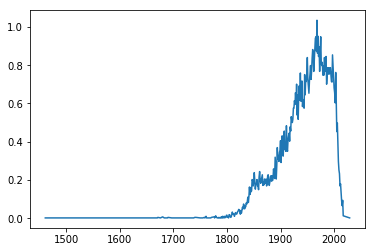

In [58]:
plt.plot(authors.average_year.value_counts().sort_index()/authors.shape[0]*100
)

## Part of artists whose birth date is missing by average dates

In [46]:
all_birth_year_missing = authors['Birth year'].isna().sum()


In [62]:
all_birth_year_missing

10366

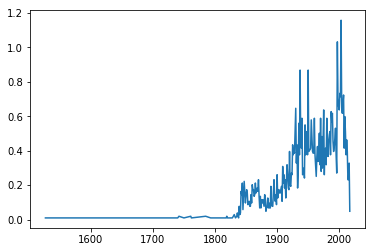

In [47]:
#average years for authors whose birth year is missing
birth_year = authors[authors['Birth year'].isna()]['average_year'].value_counts().sort_index()/all_birth_year_missing*100
plt.plot(birth_year)

## What part of artists whose birth date is missing have no average date?

In [129]:
authors.loc[(authors['average_year'].isna()) & (authors['Birth year'].isna())].shape[0]/all_birth_year_missing*100

43.507621068879025

## Part of artists whose death date is missing by average dates

In [48]:
all_death_year_missing = authors['Death year'].isna().sum()


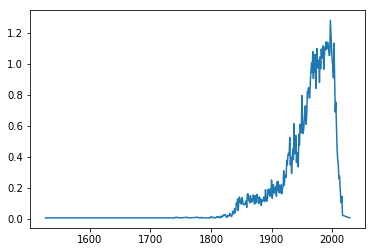

In [50]:
#average years for authors whose death year is missing
death_year = authors[authors['Death year'].isna()]['average_year'].value_counts().sort_index()/all_death_year_missing*100
plt.plot(death_year)

## What part of artists whose death date is missing have no average date?

In [131]:
authors.loc[(authors['average_year'].isna()) & (authors['Death year'].isna())].shape[0]/all_death_year_missing*100

19.071380243572396

## Part of artists whose gender is missing by average dates

In [136]:
gender_missing =authors['Gender'].isna().sum()

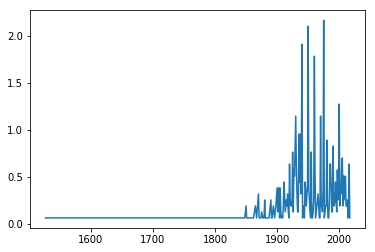

In [137]:
#average years for authors whose gender is missing
gender = authors[authors['Gender'].isna()]['average_year'].value_counts().sort_index()/gender_missing*100
plt.plot(gender)

## What part of artists whose gender is missing have no average date?

In [138]:
authors.loc[(authors['average_year'].isna()) & (authors['Gender'].isna())].shape[0]/gender_missing*100

52.29299363057325

## Part of artists whose nationality is missing by average dates

In [142]:
all_nationality_missing = authors['Nationality (original)'].isna().sum()

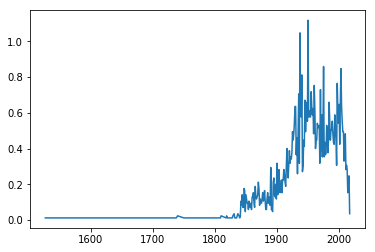

In [147]:
#average years for authors whose nationality is missing
nationality = authors[authors['Nationality (original)'].isna()]['average_year'].value_counts().sort_index()/all_nationality_missing*100
plt.plot(nationality)

## What part of artists whose nationality is missing have no average date?

In [145]:
authors.loc[(authors['average_year'].isna()) & (authors['Nationality (original)'].isna())].shape[0]/all_nationality_missing*100

38.46244407817283

## Part of artists whose birth country is missing by average dates

In [146]:
all_birthcountry_missing = authors['Birth country'].isna().sum()

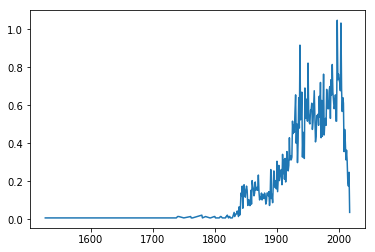

In [148]:
#average years for authors whose nationality is missing
birth_country = authors[authors['Birth country'].isna()]['average_year'].value_counts().sort_index()/all_birthcountry_missing*100
plt.plot(birth_country)

## What part of artists whose birth country is missing have no average date?

In [149]:
authors.loc[(authors['average_year'].isna()) & (authors['Birth country'].isna())].shape[0]/all_birthcountry_missing*100

32.82387190684134

## Correlation between nan in 'Birth country' and 'Nationality (original)'

In [114]:
authors2 = authors
authors2.loc[authors2['Birth country'].notna(), 'Birth country'] = 1
authors2.loc[authors2['Birth country'].isna(), 'Birth country'] = 0


In [116]:
authors2 = authors
authors2.loc[authors2['Nationality (original)'].notna(), 'Nationality (original)'] = 1
authors2.loc[authors2['Nationality (original)'].isna(), 'Nationality (original)'] = 0

In [118]:
authors2['Nationality (original)'].corr(authors2['Birth country'])

0.5969643451719596

In [119]:
authors2.loc[authors.average_year > 1900, 'Nationality (original)'].corr(authors2.loc[authors.average_year > 1900,'Birth country'])


0.5441508430682783